In [81]:
# Importing Necessary Libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor


! pip install xgboost

import xgboost as xgb











   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 1.3/150.0 MB 11.5 MB/s eta 0:00:13
   - -------------------------------------- 6.8/150.0 MB 22.6 MB/s eta 0:00:07
   --- ------------------------------------ 12.3/150.0 MB 23.6 MB/s eta 0:00:06
   ---- ----------------------------------- 17.8/150.0 MB 24.4 MB/s eta 0:00:06
   ------ --------------------------------- 23.3/150.0 MB 24.7 MB/s eta 0:00:06
   ------- -------------------------------- 28.6/150.0 MB 24.8 MB/s eta 0:00:05
   --------- ------------------------------ 34.1/150.0 MB 25.0 MB/s eta 0:00:05
   ---------- ----------------------------- 39.3/150.0 MB 25.1 MB/s eta 0:00:05
   ----------- ---------------------------- 44.6/150.0 MB 25.1 MB/s eta 0:00:05
   ------------- -------------------------- 50.1/150.0 MB 25.2 MB/s eta 0:00:04
   -------------- ------------------------- 55.3/150.0 MB 25.2 MB/s eta 0:00:04
   ---------------- ----------------------- 60.8/15


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
df=pd.read_csv(r'C:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\processed_data\bike_cleaned_data.csv')
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Weekday,Week_of_month,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1


## Model -1 Linear Regression 

Feature Selection 

In [23]:
# Using VIF to check the multicolliniearty

def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data

vif_result=calculate_vif(df.drop(columns=['Rented Bike Count']))

vif_result

,Feature,VIF
0,Hour,4.552371
1,Temperature(°C),194.948771
2,Humidity(%),190.257134
3,Wind speed (m/s),4.932709
4,Visibility (10m),11.406578
5,Dew point temperature(°C),129.655796
6,Solar Radiation (MJ/m2),2.923380
7,Rainfall(mm),1.105143
8,Snowfall (cm),1.181536
9,Holiday,21.513566


In [24]:
def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data

vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)']))

vif_result

,Feature,VIF
0,Hour,4.547403
1,Temperature(°C),10.972805
2,Humidity(%),24.786188
3,Wind speed (m/s),4.924584
4,Visibility (10m),11.374361
5,Solar Radiation (MJ/m2),2.797187
6,Rainfall(mm),1.089900
7,Snowfall (cm),1.174922
8,Holiday,21.512911
9,Functioning Day,32.245337


In [25]:
def calculate_vif(df):
  vif_data=pd.DataFrame()
  vif_data["Feature"]=df.columns

  vif_values=[]
  for i in range(len(df.columns)):
    vif_values.append(variance_inflation_factor(df.values,i))

  vif_data['VIF']=vif_values

  return vif_data


vif_result

,Feature,VIF
0,Hour,4.547403
1,Temperature(°C),10.972805
2,Humidity(%),24.786188
3,Wind speed (m/s),4.924584
4,Visibility (10m),11.374361
5,Solar Radiation (MJ/m2),2.797187
6,Rainfall(mm),1.089900
7,Snowfall (cm),1.174922
8,Holiday,21.512911
9,Functioning Day,32.245337


In [26]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Holiday','Week_of_month','Visibility (10m)']))

vif_result

,Feature,VIF
0,Hour,4.520307
1,Temperature(°C),10.914745
2,Humidity(%),16.749478
3,Wind speed (m/s),4.886260
4,Solar Radiation (MJ/m2),2.656530
5,Rainfall(mm),1.088156
6,Snowfall (cm),1.172485
7,Functioning Day,32.231808
8,Year,77.622128
9,Month,8.355297


In [27]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Functioning Day','Week_of_month','Visibility (10m)']))

vif_result

,Feature,VIF
0,Hour,4.520387
1,Temperature(°C),10.915730
2,Humidity(%),16.752201
3,Wind speed (m/s),4.882852
4,Solar Radiation (MJ/m2),2.657103
5,Rainfall(mm),1.088145
6,Snowfall (cm),1.173887
7,Holiday,20.857039
8,Year,72.433868
9,Month,8.388110


In [28]:
vif_result=calculate_vif(df.drop(columns=['Rented Bike Count','Dew point temperature(°C)','Functioning Day','Week_of_month','Visibility (10m)','Year','Holiday']))

vif_result

# Now we can observe here , almost all high multicollinearity varaibles are removed and these variables stands good 

,Feature,VIF
0,Hour,4.275794
1,Temperature(°C),10.575253
2,Humidity(%),10.516972
3,Wind speed (m/s),4.539208
4,Solar Radiation (MJ/m2),2.514839
5,Rainfall(mm),1.071044
6,Snowfall (cm),1.143438
7,Month,6.421893
8,Day,3.909134
9,Weekday,3.129739


Feature Scaling

In [29]:
df_linear_regression = df.loc[:, [
    'Rented Bike Count', 'Hour', 'Temperature(°C)', 'Humidity(%)',
    'Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
    'Snowfall (cm)', 'Month', 'Day', 'Weekday',
    'season_Spring', 'season_Summer', 'season_Winter'
]]


In [30]:
df_linear_regression.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,0.0,0.0,0.0,12,1,4,0,0,1
1,204,1,-5.5,38,0.8,0.0,0.0,0.0,12,1,4,0,0,1
2,173,2,-6.0,39,1.0,0.0,0.0,0.0,12,1,4,0,0,1
3,107,3,-6.2,40,0.9,0.0,0.0,0.0,12,1,4,0,0,1
4,78,4,-6.0,36,2.3,0.0,0.0,0.0,12,1,4,0,0,1


<Axes: xlabel='Rented Bike Count', ylabel='Density'>

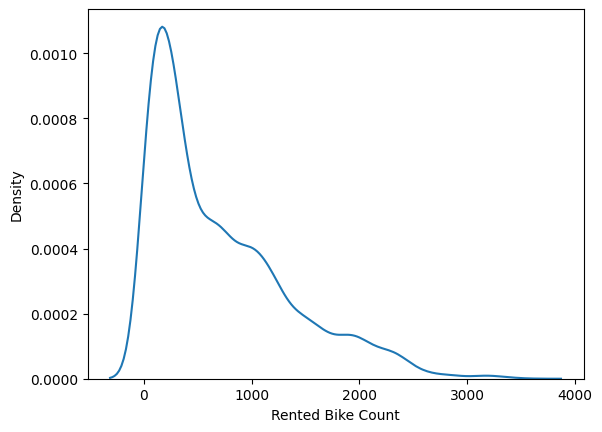

In [31]:
# Check the output data for skweness 
sns.kdeplot(df_linear_regression['Rented Bike Count'])

# we can observer distribution is right skewed , applying log transformation here to reduce the skew and 
# linear model works well with noraml distribution data

<Axes: xlabel='Rented Bike Count', ylabel='Density'>

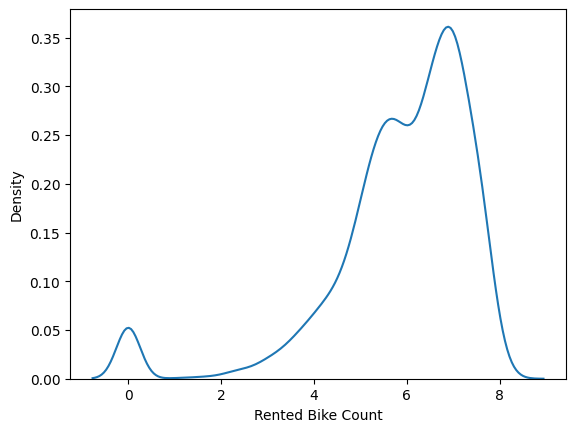

In [32]:
df_linear_regression['Rented Bike Count'] = np.log1p(df_linear_regression['Rented Bike Count'])

sns.kdeplot(df_linear_regression['Rented Bike Count'])

In [33]:
# Using Standard scalar to scale independent variables 

df_linear_regression.columns



num_cols = [
    'Hour', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
    'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)',
    'Month', 'Day', 'Weekday'
]


dummy_cols = ['season_Spring', 'season_Summer','season_Winter'] 

# Separate out numerical and dummy features
X_num = df_linear_regression[num_cols]
X_dummy = df_linear_regression[dummy_cols]

# Scale only the numerical features
scaler = StandardScaler()
X_num_scaled = pd.DataFrame(scaler.fit_transform(X_num), columns=num_cols, index=df_linear_regression.index)

# Concatenate the scaled numerical features with dummy features
X_final_scaled = pd.concat([X_num_scaled, X_dummy], axis=1)

# View the scaled data
X_final_scaled.head()


,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Month,Day,Weekday,season_Spring,season_Summer,season_Winter
0,-1.661325,-1.513957,-1.042483,0.458476,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
1,-1.516862,-1.539074,-0.993370,-0.892561,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
2,-1.372399,-1.580936,-0.944257,-0.699556,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
3,-1.227936,-1.597680,-0.895144,-0.796059,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1
4,-1.083473,-1.580936,-1.091596,0.554978,-0.655132,-0.1318,-0.171891,1.587648,-1.673503,0.499144,0,0,1


In [34]:
y=df_linear_regression['Rented Bike Count']

y.head()

0    5.541264
1    5.323010
2    5.159055
3    4.682131
4    4.369448
Name: Rented Bike Count, dtype: float64

In [35]:
# Split your data to train and test.


# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split( X_final_scaled, y, test_size=0.2, random_state=42)
     

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)


# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)

print(f"Test RMSE: {rmse:.3f}")
print(f"Test MAE: {mae:.3f}")
print(f"Test R²: {r2:.3f}")



Test RMSE: 1.312
Test MAE: 0.799
Test R²: 0.289


In [37]:
# Predict on training data
y_train_pred = model.predict(X_train)

# Training RMSE
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Training MAE
train_mae = mean_absolute_error(y_train, y_train_pred)

# Training R²
train_r2 = r2_score(y_train, y_train_pred)

print(f"Training RMSE: {train_rmse:.3f}")
print(f"Training MAE: {train_mae:.3f}")
print(f"Training R²: {train_r2:.3f}")

Training RMSE: 1.345
Training MAE: 0.820
Training R²: 0.279


In [38]:


# Define parameter grid for alpha
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Ridge Regression
ridge = Ridge()
ridge_grid = GridSearchCV(ridge, param_grid, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train, y_train)
best_ridge = ridge_grid.best_estimator_

print(f"Best Ridge alpha: {ridge_grid.best_params_['alpha']}")
ridge_pred = best_ridge.predict(X_test)
ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_r2 = r2_score(y_test, ridge_pred)

print(f"Ridge Test RMSE: {ridge_rmse:.3f}")
print(f"Ridge Test MAE: {ridge_mae:.3f}")
print(f"Ridge Test R²: {ridge_r2:.3f}")

# Lasso Regression
lasso = Lasso(max_iter=10000)
lasso_grid = GridSearchCV(lasso, param_grid, cv=5, scoring='neg_mean_squared_error')
lasso_grid.fit(X_train, y_train)
best_lasso = lasso_grid.best_estimator_

print(f"\nBest Lasso alpha: {lasso_grid.best_params_['alpha']}")
lasso_pred = best_lasso.predict(X_test)
lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_pred))
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_r2 = r2_score(y_test, lasso_pred)

print(f"Lasso Test RMSE: {lasso_rmse:.3f}")
print(f"Lasso Test MAE: {lasso_mae:.3f}")
print(f"Lasso Test R²: {lasso_r2:.3f}")


Best Ridge alpha: 10
Ridge Test RMSE: 1.312
Ridge Test MAE: 0.799
Ridge Test R²: 0.289

Best Lasso alpha: 0.001
Lasso Test RMSE: 1.312
Lasso Test MAE: 0.799
Lasso Test R²: 0.289


Observations 
- Low R² values (~0.28–0.29) — meaning they explain less than 30% of the variation in bike demand.

- Very similar performance across all linear variants, even after hyperparameter tuning — suggesting the limitations are in the model's assumptions, not in the tuning.

## Model-2 Random Forest 

In [42]:
df=pd.read_csv(r'C:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\processed_data\bike_cleaned_data.csv')
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Weekday,Week_of_month,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1


In [46]:
X= df.drop('Rented Bike Count',axis=1)
y= df["Rented Bike Count"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [47]:
rf_model= RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
y_train_pred = rf_model.predict(X_train)

print("R2 Score",r2_score(y_train,y_train_pred))
print("RMSE:",  np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("MAE:", mean_absolute_error(y_train, y_train_pred))

R2 Score 0.9907294249404117
RMSE: 62.0867273776521
MAE: 35.96225171232877


In [53]:
y_pred = rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9282370611914754
RMSE: 172.9154662298101
MAE: 98.08901255707764


In [ ]:
# We can clearly see the moderate overitting , lets hypertune and see 

In [62]:
param_grid = {
    'n_estimators': [100, 200,500],
    'max_depth': [5,8,10,12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,5,10],
    'max_features': ['sqrt', 'auto']
}

rf = RandomForestRegressor(random_state=42)


#  Setup GridSearch with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='r2',                   # Optimize for R²
    n_jobs=-1,                      # Use all processors
    verbose=2
)

# 6. Fit on training data
grid_search.fit(X_train, y_train)

# 7. Best parameters and model
print("✅ Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
243 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~

✅ Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [63]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)

# Show top 5 performing parameter sets
cv_results[['params', 'mean_test_score', 'std_test_score']].head()

,params,mean_test_score,std_test_score
145,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.874661,0.008320
144,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.873948,0.007416
146,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.873779,0.008466
149,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.871943,0.008565
148,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.871871,0.008395


In [64]:
best_rf = grid_search.best_estimator_

# 8. Evaluate on both train and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n🔍 {dataset_name} Metrics:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")


🔍 Train Metrics:
R² Score: 0.931317434444437
RMSE: 168.9929884281835
MAE: 107.80192849124809

🔍 Test Metrics:
R² Score: 0.8633213091150131
RMSE: 238.63499812924408
MAE: 151.20721051414603


Better than previous but still overfitting is there , a good gap between errors 

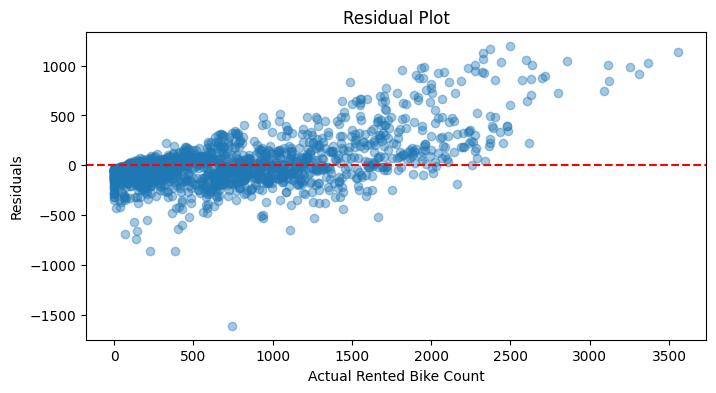

In [65]:
import matplotlib.pyplot as plt

residuals = y_test - grid_search.best_estimator_.predict(X_test)

plt.figure(figsize=(8,4))
plt.scatter(y_test, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Observations
- Funnel shape / increasing spread
- As the actual count increases (right side of x-axis), the residuals get more spread out.
- The model struggles more with higher bike demand, with larger error variance.
- This is a classic sign of heteroscedasticity(not constant variance)

In [69]:
# Tranforming the output variable and lets try again 


X= df.drop('Rented Bike Count',axis=1)
y= np.log1p(df["Rented Bike Count"])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [70]:
rf_model= RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [71]:
y_train_pred = rf_model.predict(X_train)

print("R2 Score",r2_score(y_train,y_train_pred))
print("RMSE:",  np.sqrt(mean_squared_error(y_train, y_train_pred)))

print("MAE:", mean_absolute_error(y_train, y_train_pred))

R2 Score 0.9936858561996977
RMSE: 0.1259356816158988
MAE: 0.07107284350460948


In [72]:
y_pred = rf_model.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:",  np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))

R2 Score: 0.9585373338607541
RMSE: 0.3169713452202733
MAE: 0.1838360233803793


In [73]:
param_grid = {
    'n_estimators': [100, 200,500],
    'max_depth': [5,8,10,12],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1,2,5,10],
    'max_features': ['sqrt', 'auto']
}

rf = RandomForestRegressor(random_state=42)


#  Setup GridSearch with Cross-Validation
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,                           # 5-fold cross-validation
    scoring='r2',                   # Optimize for R²
    n_jobs=-1,                      # Use all processors
    verbose=2
)

# 6. Fit on training data
grid_search.fit(X_train, y_train)

# 7. Best parameters and model
print("✅ Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 192 candidates, totalling 960 fits


c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
480 fits failed out of a total of 960.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
131 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\env\Lib\site-packages\sklearn\base.py", line 1356, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~

✅ Best Parameters: {'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [74]:
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results = cv_results.sort_values(by='mean_test_score', ascending=False)

# Show top 5 performing parameter sets
cv_results[['params', 'mean_test_score', 'std_test_score']].head()

,params,mean_test_score,std_test_score
146,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.929367,0.004946
145,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.928373,0.004923
149,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.927293,0.004917
144,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.927219,0.005067
148,"{'max_depth': 12, 'max_features': 'sqrt', 'min...",0.926690,0.005050


In [75]:
best_rf = grid_search.best_estimator_

# 8. Evaluate on both train and test sets
y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n🔍 {dataset_name} Metrics:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))

print_metrics(y_train, y_train_pred, "Train")
print_metrics(y_test, y_test_pred, "Test")


🔍 Train Metrics:
R² Score: 0.9691336932435447
RMSE: 0.2784414565173501
MAE: 0.20790094086158958

🔍 Test Metrics:
R² Score: 0.9343131776437422
RMSE: 0.39896106742315873
MAE: 0.285131239041808


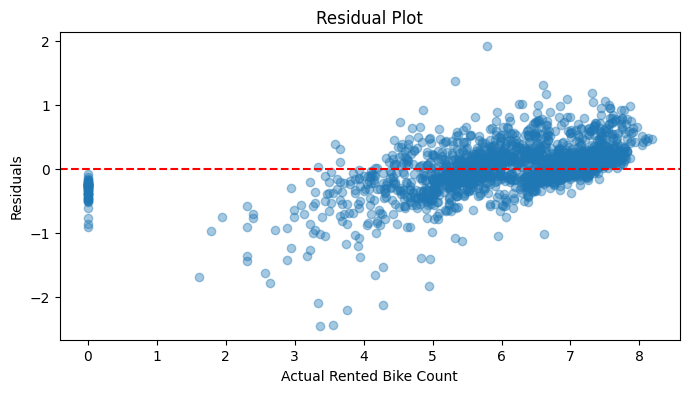

In [76]:
import matplotlib.pyplot as plt

residuals = y_test - grid_search.best_estimator_.predict(X_test)

plt.figure(figsize=(8,4))
plt.scatter(y_test, residuals, alpha=0.4)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Observations

- No funnel shape 
- Most residuals cluster tightly around the zero line - good sign of minimal bias.

- It means predictions are not systematically over or under.

In [78]:
# Reverse transform predictions and actuals
y_train_pred_original = np.expm1(y_train_pred)
y_test_pred_original = np.expm1(y_test_pred)

y_train_original = np.expm1(y_train)
y_test_original = np.expm1(y_test)

# Evaluate in original scale
print("\n🎯 Evaluation in Original Scale")
print_metrics(y_train_original, y_train_pred_original, "Train")
print_metrics(y_test_original, y_test_pred_original, "Test")



🎯 Evaluation in Original Scale

🔍 Train Metrics:
R² Score: 0.8802259668107589
RMSE: 223.16535203196852
MAE: 129.47278827429358

🔍 Test Metrics:
R² Score: 0.8059503602326037
RMSE: 284.3414361955768
MAE: 164.26861829980106


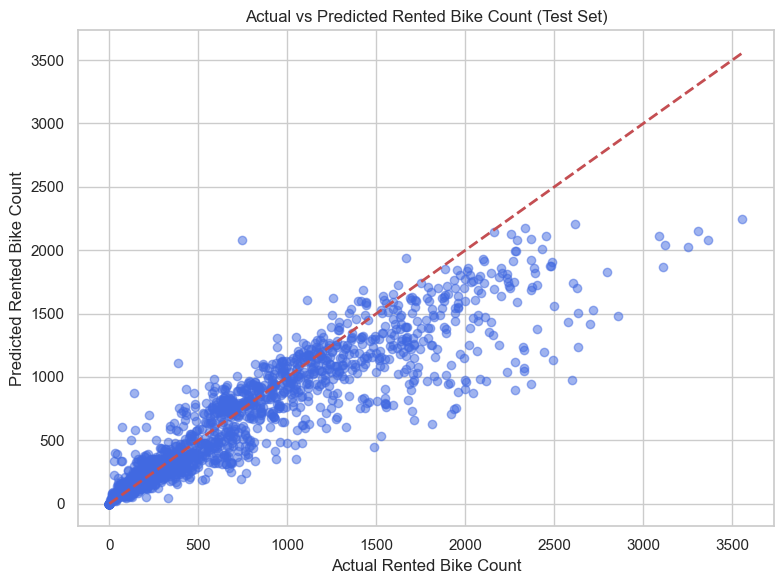

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Scatter plot for Test Set
plt.figure(figsize=(8, 6))
plt.scatter(y_test_original, y_test_pred_original, alpha=0.5, color='royalblue')
plt.plot([y_test_original.min(), y_test_original.max()],
         [y_test_original.min(), y_test_original.max()],
         'r--', lw=2)

plt.xlabel("Actual Rented Bike Count")
plt.ylabel("Predicted Rented Bike Count")
plt.title("Actual vs Predicted Rented Bike Count (Test Set)")
plt.tight_layout()
plt.show()


## Mode-3 GBM and Xg Boost 

In [86]:
df=pd.read_csv(r'C:\Users\Vishnu\Desktop\Yulu_Bike_Sharing_Demand_Prediction\processed_data\bike_cleaned_data.csv')
df.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Year,Month,Day,Weekday,Week_of_month,season_Spring,season_Summer,season_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,1,1,2017,12,1,4,1,0,0,1


In [91]:
X= df.drop('Rented Bike Count',axis=1)
y= np.log1p(df["Rented Bike Count"])

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [92]:
def print_metrics(y_true, y_pred, dataset_name):
    print(f"\n🔍 {dataset_name} Metrics:")
    print("R² Score:", r2_score(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))


In [93]:
gbm = GradientBoostingRegressor(random_state=42)
gbm.fit(X_train, y_train)

# Predict
y_train_pred_gbm = np.expm1(gbm.predict(X_train))
y_test_pred_gbm = np.expm1(gbm.predict(X_test))
y_train_actual = np.expm1(y_train)  # original scale

# Evaluate
print_metrics(y_train_actual, y_train_pred_gbm, "GBM Train")
print_metrics(np.expm1(y_test), y_test_pred_gbm, "GBM Test")



🔍 GBM Train Metrics:
R² Score: 0.8436832710591897
RMSE: 254.94597540058913
MAE: 150.25880657486894

🔍 GBM Test Metrics:
R² Score: 0.8282230010220831
RMSE: 267.5261489069717
MAE: 156.87437813706862


In [94]:
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_train_pred_xgb = np.expm1(xgb_model.predict(X_train))
y_test_pred_xgb = np.expm1(xgb_model.predict(X_test))

# Evaluate
print_metrics(y_train_actual, y_train_pred_xgb, "XGBoost Train")
print_metrics(np.expm1(y_test), y_test_pred_xgb, "XGBoost Test")



🔍 XGBoost Train Metrics:
R² Score: 0.9800725038728171
RMSE: 91.02732868855989
MAE: 50.3033244211544

🔍 XGBoost Test Metrics:
R² Score: 0.9439755309301923
RMSE: 152.78214639658694
MAE: 83.18683709323368


In [ ]:
# Base model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=50,                # Try 50 combinations
    scoring='r2',             # Optimize for R²
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on log-transformed y
random_search.fit(X_train, y_train)

# Best model
best_xgb = random_search.best_estimator_
print("✅ Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


In [ ]:
# Predict and reverse transform
y_train_pred = np.expm1(best_xgb.predict(X_train))
y_test_pred = np.expm1(best_xgb.predict(X_test))
y_train_actual = np.expm1(y_train)
y_test_actual = np.expm1(y_test)

# Metrics
print_metrics(y_train_actual, y_train_pred, "Tuned XGBoost Train")
print_metrics(y_test_actual, y_test_pred, "Tuned XGBoost Test")


In [ ]:
import matplotlib.pyplot as plt
xgb.plot_importance(best_xgb, importance_type='gain', max_num_features=10)
plt.title("Top 10 Feature Importances (Gain)")
plt.show()


In [ ]:
xgb.plot_importance(xgb_model, importance_type='gain', max_num_features=10)
